

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altereos comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>








<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Estamos no caminho certo com essa versão, mas retocar os pontos indicados abaixo nos fará chegar em um resultado ainda mais incrível.
    
Conte comigo para ajudá-lo (a) em qualquer questão que possa vir a ter! Lembre-se de usar as caixas azuis para se comunicar comigo.
    
Até breve.
</div>



<div class="alert alert-danger">
<strong>Comentário do revisor v2</strong>

Avançamos bastante com os ajustes, mas ainda temos alguns pontos pendentes. Procure por 'v2' para encontrá-los com mais facilidade.

Estamos quase lá! Vamos juntos até o fim.
</div>

<div class="alert alert-danger">
<strong>Comentário do revisor v3</strong>

Carlos, avançamos bem nessa segunda iteração. Tem alguns pequenos ajustes finais que gostaria que fossem feitos para finalizar por aqui. 

Marquei esses pontos como v3 ao longo do projeto, combinado?

Até breve.
</div>

# Projeto Sprint 10 - Relatório de pesquisa de mercado de resturantes, Análise gráfica e apresentação

# Introdução

Análise e ralatório para abrir uma pequena cafeteria com garçons robôs em Los Angeles.
No projeto é realizada inferências sobre condições atuais do mercado, as principais caracteristicas encontradas com a base de dados coletada e as possibilidades levantadas para a abertura dessa cafeteria.

[Apresentação](https://1drv.ms/b/c/724b2c88352c89d1/EVvfU94QocVMrexGt1U5fGcBPnJHpIbeNR2rAKlGJpc-cg?e=dFfXG0)

## Sumário

1. [Abertura dos dados](#abertura_dados)
    * 1.1 [Verificação de dados duplicados e nulos](#verificacao_dados)
2. [Análise exploratória](#analise_exploratoria)
    * 2.1 [Agrupamentos iniciais](#agrupamentos_iniciais)
    * 2.2 [Gráficos iniciais](#graficos_iniciais)
3. [Hipóteses e Verificações](#verificacoes)
    * 3.1 [Gráficos Rede True and False](#graf_chain)
    * 3.2 [Gráfico Média de Cadeiras](#graf_media)
4. [Análise do negócio por endereço](#df_ruas)
    * 4.1 [Análise dos principais endereços](#df_10)
    * 4.2 [Análise dos principais endereços por Rede True and False](#df_10_TF)
5. [Conclusão](#conclusao)

<a id="abertura_dados"></a>
## 1. Abertura dos dados

In [443]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import math as mth
import seaborn as sns
from plotly import graph_objects as go
import plotly.express as px
import re

In [444]:
df = pd.read_csv('rest_data_us_upd.csv')

df

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


In [445]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB
None


In [446]:
print(df.describe())

                 id       number
count   9651.000000  9651.000000
mean   16611.000000    43.695161
std     2786.148058    47.622874
min    11786.000000     1.000000
25%    14198.500000    14.000000
50%    16611.000000    27.000000
75%    19023.500000    46.000000
max    21436.000000   229.000000


<a id="verificacao_dados"></a>
### 1.1 Verificação de duplicados e nulos 

    Duplicados: Sem valores duplicados;
    Nulos: 3 valores nulos na coluna 'chain', optado por exclui-los pela quantidade;

In [447]:
print(df.duplicated().sum())

0


In [448]:
print(df.isna().sum())
print()
print(df[df['chain'].isna()])

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

         id              object_name               address chain object_type  \
7408  19194  TAQUERIA LOS 3 CARNALES  5000 E WHITTIER BLVD   NaN  Restaurant   
7523  19309     JAMMIN JIMMY'S PIZZA   1641 FIRESTONE BLVD   NaN       Pizza   
8648  20434    THE LEXINGTON THEATER          129 E 3RD ST   NaN  Restaurant   

      number  
7408      14  
7523       1  
8648      35  


In [449]:
rest_df = df.dropna()
print(rest_df.isna().sum())

id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a consistência dos dados.

Sempre importante para garantir uma análise robusta!
</div>



<a id="analise_exploratoria"></a>
## 2 Análise exploratória

<a id="agrupamentos_iniciais"></a>
### 2.1 Agrupamentos iniciais

In [450]:
# agrupamento por tipo
group_type = rest_df.groupby('object_type').agg({'id':'count'}).reset_index()

# agrupamento por rede
group_chain = rest_df.groupby('chain').agg({'id':'count'}).reset_index()


<a id="graficos_iniciais"></a>
### 2.2 Gráficos iniciais

    Verificação do tipo de estabelecimentos mais relevantes em quantidade

Text(0.5, 1.0, 'Quantidade de estabelecimentos x Tipo')

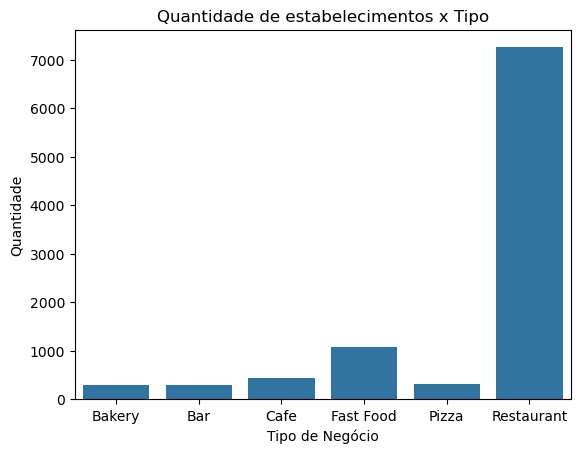

In [451]:
# gráfico por tipo e quantidade de estabelecimentos

g1 = sns.barplot(
    data=group_type, 
    x='object_type', 
    y='id',
    )
g1.set_xlabel('Tipo de Negócio')
g1.set_ylabel('Quantidade')
plt.title('Quantidade de estabelecimentos x Tipo')

    Verificação da proporção de estabelicimentos que são de Rede e os que são independentes

   chain    id
0  False  5972
1   True  3676


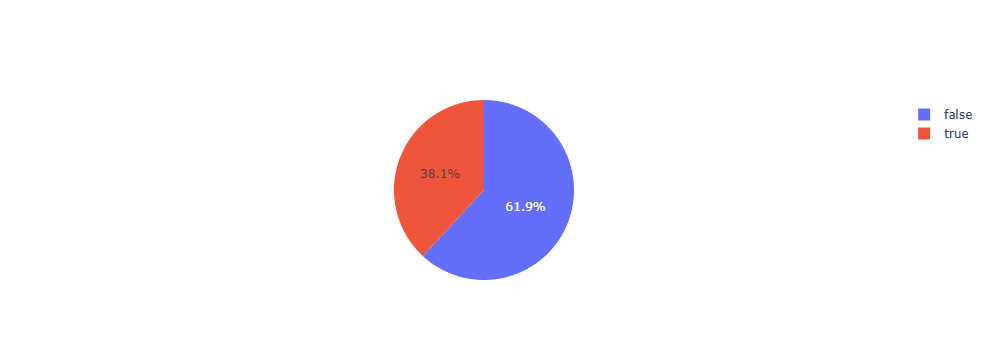

In [452]:
print(group_chain)
fig = go.Figure(data=[go.Pie(values=group_chain['id'], labels=group_chain['chain'])])
fig.show()

Text(0.5, 1.0, 'Proporção de Rede')

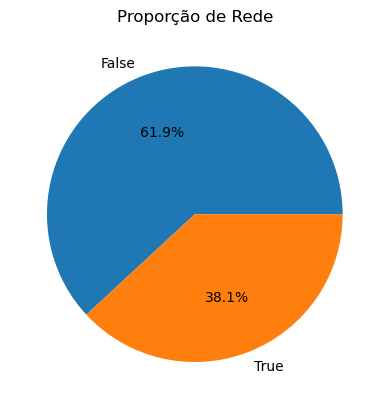

In [453]:
# gráfico por tipo e quantidade de estabelecimentos

plt.pie(
    group_chain['id'],
    labels=group_chain['chain'], 
    autopct='%1.1f%%'
    )
plt.title('Proporção de Rede')

# values=group_chain['id'], labels=group_chain['chain']

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Estudos relativos ao tipo de estabelecimento e a proporção de redes foram entregues.
</div>



<a id="verificacoes"></a>
## 3 Hipóteses e Verificações

Verificação das proporções para Rede

In [454]:
# filtro por rede
filtro_type_rede = rest_df[rest_df['chain']==True]

# agrupamento por tipo e rede True
group_type_rede = filtro_type_rede.groupby('object_type').agg({'id':'count'}).reset_index()

print(group_type_rede.sort_values(by='id',ascending=False))


  object_type    id
5  Restaurant  2292
3   Fast Food   605
0      Bakery   283
2        Cafe   266
4       Pizza   153
1         Bar    77


Verificação das proporções para Rede e independentes

In [455]:
# agrupamento por tipo e rede e assentos
group_type_number = rest_df.groupby(['object_type','chain']).agg({'id':'count','number':'sum'}).reset_index()

print(group_type_number.sort_values(by=['number','chain'],ascending=[False,True]))

   object_type  chain    id  number
9   Restaurant  False  4961  245688
10  Restaurant   True  2292  102810
6    Fast Food   True   605   23044
5    Fast Food  False   461   10895
1          Bar  False   215    9972
4         Cafe   True   266    6894
0       Bakery   True   283    6162
7        Pizza  False   166    5200
3         Cafe  False   169    3981
8        Pizza   True   153    3906
2          Bar   True    77    3100


<a id="graf_chain"></a>
### 3.1 Gráficos Rede True and False

 - Quantidade geral de independentes é maior;
 - Rede: Restaurantes dominam, seguido por Fast Food

Text(0.5, 1.0, 'Quantidade de estabelecimentos x Tipo x Rede')

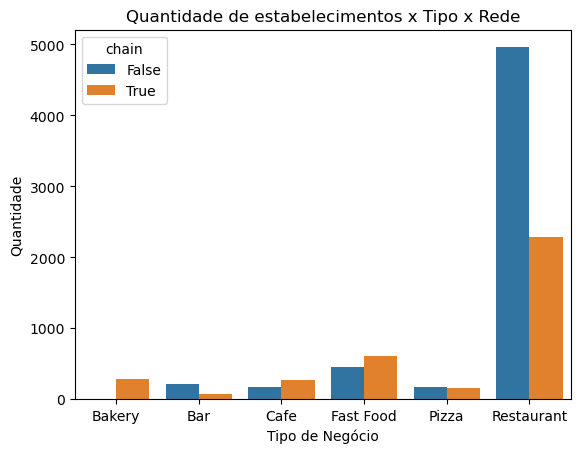

In [456]:
# gráfico por tipo e rede e assentos
# quantidade de estabelicimentos

g2 = sns.barplot(
    data=group_type_number, 
    x='object_type', 
    y='id', 
    hue='chain',)
g2.set_xlabel('Tipo de Negócio')
g2.set_ylabel('Quantidade')
plt.title('Quantidade de estabelecimentos x Tipo x Rede')

 - Número de cadeiras segue a mesma proporção dos estabelecimentos: Quantidade geral de independentes é maior; Rede: Restaurantes dominam, seguido por Fast Food

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Estudos específicos da proporção de redes por tipo de estabelecimento devidamente conduzidos.
</div>



Text(0.5, 1.0, 'Quantidade de cadeiras x Tipo x Rede')

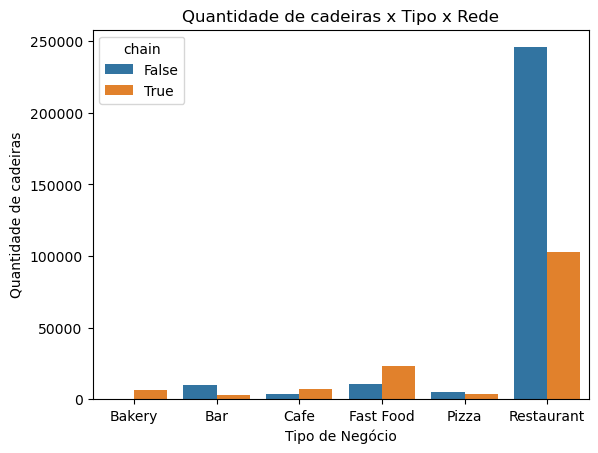

In [457]:
# gráfico por tipo e rede e assentos
# quantidade de cadeiras

g3 = sns.barplot(
    data=group_type_number, 
    x='object_type', 
    y='number', 
    hue='chain',)
g3.set_xlabel('Tipo de Negócio')
g3.set_ylabel('Quantidade de cadeiras')
plt.title('Quantidade de cadeiras x Tipo x Rede')

<a id="graf_media"></a>
### 3.2 Gráfico Média de Cadeiras

In [458]:
# 
# Determine o número médio de assentos para cada tipo de restaurante. 
# Em média, qual tipo de restaurante tem o maior número de assentos? Construa gráficos.

# agrupamento por tipo e rede e assentos
group_number_mean = rest_df.groupby(['object_type','chain']).agg({'id':'count','number':'mean'}).reset_index()

print(group_number_mean.sort_values(by=['number','chain'],ascending=[False,True]))

   object_type  chain    id     number
9   Restaurant  False  4961  49.523886
1          Bar  False   215  46.381395
10  Restaurant   True  2292  44.856021
2          Bar   True    77  40.259740
6    Fast Food   True   605  38.089256
7        Pizza  False   166  31.325301
4         Cafe   True   266  25.917293
8        Pizza   True   153  25.529412
5    Fast Food  False   461  23.633406
3         Cafe  False   169  23.556213
0       Bakery   True   283  21.773852


 - As médias de cadeiras são próximas entre Rede e Independentes;
 - Tipo de estabelecimento que sai da média é Fast Food, onde em Rede é maior;

Text(0.5, 1.0, 'Quantidade média de cadeiras x Tipo')

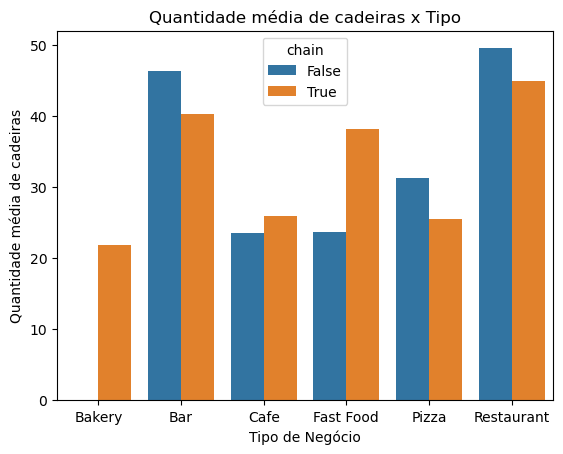

In [459]:
# gráfico por tipo e rede e assentos
# quantidade média de cadeiras

g4 = sns.barplot(
    data=group_number_mean, 
    x='object_type', 
    y='number', 
    hue='chain',)
g4.set_xlabel('Tipo de Negócio')
g4.set_ylabel('Quantidade média de cadeiras')
plt.title('Quantidade média de cadeiras x Tipo')

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Cálculo das médias foi realizado e devidamente ilustrado nessa sessão.
</div>



<a id="df_ruas"></a>
## 4 Análise do negócio por endereço

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Temos problemas aqui, Carlos.

Os estudos propostos nessa sessão dependem da separação entre o número e o nome presentes nas strings com os endereços, para que os agrupamentos possam ser devidamente realizados com as ruas.

Vamos focar no uso de regex para a realização dessa separação e revisão das análises dessa sessão, combinado?
</div>



<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Alteração no df utilizando Regex e criando uma nova coluna de ruas sem os números.
Refeita as análises.
</div>


<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Perfeito, bom trabalho com o regex!
</div>


    Novo agrupamento somente com os nomes das ruas, retiranto os números

In [460]:
rest_df['street'] = rest_df['address'].str.replace(r'^\d+\s+', '', regex=True)

rest_df

C:\Users\carlo\AppData\Local\Temp\ipykernel_4704\3158390153.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,object_name,address,chain,object_type,number,street
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9,WORLD WAY 120
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20,HOLLYWOOD BLVD 253
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE
...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,W TEMPLE AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,MELROSE AVE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,HOLLYWOOD BLVD
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,S SPRING ST STE 100


 - Verificamos a predominância de estabelecimentos independentes;
 - Mesmo com agrupamento sendo feito separando as Redes, é possível verificar os locais mais movimentados;
 - Podemos ver a predominância do tipo Restaurantes nos locais mais movimentados;

In [461]:
# agrupamento por tipo e rede e assentos
group_address = rest_df.groupby(['street','object_type','chain']).agg({'id':'count','number':'sum'}).reset_index()

print(group_address.sort_values(by=['number','chain'],ascending=[False,True]).head(20))

                 street object_type  chain   id  number
3710      W SUNSET BLVD  Restaurant  False  158    8899
3615        W PICO BLVD  Restaurant  False  169    7263
3926      WILSHIRE BLVD  Restaurant  False  100    6358
882      HOLLYWOOD BLVD  Restaurant  False  101    5829
1119        MELROSE AVE  Restaurant  False   85    4828
3021           W 3RD ST  Restaurant  False   86    4427
212        BEVERLY BLVD  Restaurant  False   77    4314
3511     W OLYMPIC BLVD  Restaurant  False   72    4209
1895      S FIGUEROA ST  Restaurant  False   69    4140
2525      S WESTERN AVE  Restaurant  False   64    3356
2447      S VERMONT AVE  Restaurant  False   71    3235
3711      W SUNSET BLVD  Restaurant   True   59    3189
3275           W 8TH ST  Restaurant  False   54    2780
3865      WESTWOOD BLVD  Restaurant  False   46    2745
3245           W 7TH ST  Restaurant  False   38    2611
3616        W PICO BLVD  Restaurant   True   49    2594
1234    N CAHUENGA BLVD  Restaurant  False   31 

In [462]:
# merge para obter duas colunas de cadeiras para realizar 2 operações de agregar

merge_df = rest_df.merge(rest_df, on=['id','object_name','address','chain','object_type','street'], how='left', suffixes=(['1','2']))

print(merge_df)

         id          object_name                      address  chain  \
0     11786  HABITAT COFFEE SHOP       3708 N EAGLE ROCK BLVD  False   
1     11787             REILLY'S            100 WORLD WAY 120  False   
2     11788       STREET CHURROS      6801 HOLLYWOOD BLVD 253  False   
3     11789    TRINITI ECHO PARK           1814 W SUNSET BLVD  False   
4     11790               POLLEN           2100 ECHO PARK AVE  False   
...     ...                  ...                          ...    ...   
9643  21432      HALL OF JUSTICE             217 W TEMPLE AVE  False   
9644  21433          FIN-MELROSE             5750 MELROSE AVE  False   
9645  21434          JUICY WINGZ          6741 HOLLYWOOD BLVD   True   
9646  21435      MEDIDATE COFFEE      548 S SPRING ST STE 100  False   
9647  21436         CAFE SPROUTS  1300 S SAN PEDRO ST STE 111   True   

     object_type  number1                  street  number2  
0           Cafe       26       N EAGLE ROCK BLVD       26  
1     Restaur

 - Sem a distinção de Rede, é possivel verificar quais locais possuem a maior quantidade de estabelecimentos e podemos ordenar visualizando as médias de cadeiras e quantidades totais;

In [463]:
# agrupamento por endereço e cadeiras
group_merge_df = merge_df.groupby(['street',]).agg({'id':'count','number1':'mean','number2':'sum'}).reset_index()

print(group_merge_df.sort_values(by=['id','number2'],ascending=[False,False]))

                    street   id    number1  number2
2680         W SUNSET BLVD  296  50.918919    15072
2611           W PICO BLVD  288  40.878472    11773
581         HOLLYWOOD BLVD  167  53.730539     8973
2826         WILSHIRE BLVD  161  62.130435    10003
1711         S VERMONT AVE  148  45.878378     6790
...                    ...  ...        ...      ...
2829    WILSHIRE BLVD #103    1   1.000000        1
2886      WILSHIRE BLVD P1    1   1.000000        1
2949  WILSHIRE BLVD STE 26    1   1.000000        1
3011         WORLD WAY 645    1   1.000000        1
3056         WORLD WAY T5B    1   1.000000        1

[3077 rows x 4 columns]


<div class="alert alert-warning">
<strong>Comentário do revisor v2</strong>

Bom trabalho com a manipulação dos endereços!

Carlos, sugiro que nas próximas lições sempre busque usar nomes de variáveis menos genéricos e que deixem evidente o seu conteúdo.
</div>

<a id="df_10"></a>
### 4.1 Análise dos principais endereços

In [464]:
address_10 = group_merge_df.nlargest(10,'id')
print(address_10)

                 street   id    number1  number2
2680      W SUNSET BLVD  296  50.918919    15072
2611        W PICO BLVD  288  40.878472    11773
581      HOLLYWOOD BLVD  167  53.730539     8973
2826      WILSHIRE BLVD  161  62.130435    10003
1711      S VERMONT AVE  148  45.878378     6790
1922  SANTA MONICA BLVD  146  32.390411     4729
2164           W 3RD ST  145  43.931034     6370
147        BEVERLY BLVD  135  44.770370     6044
1302      S FIGUEROA ST  134  50.761194     6802
754         MELROSE AVE  128  52.429688     6711


<div class="alert alert-info">
<strong>Comentário do estudante v2</strong>

 - Gráfico de dez ruas com o maior número de restaurantes.
</div>

Text(0.5, 1.0, 'Local x Núm de estabelecimentos')

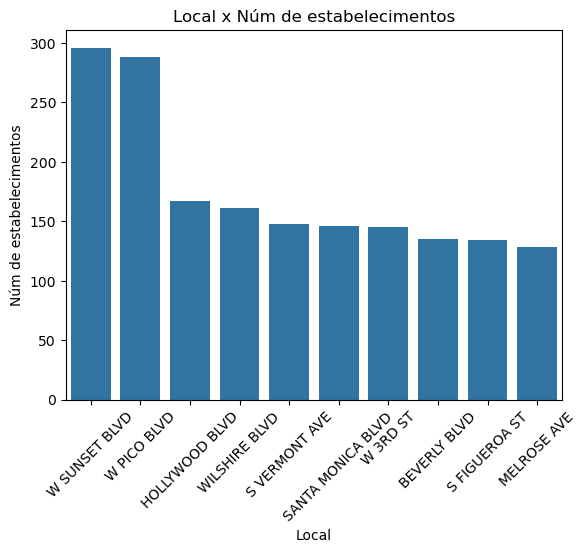

In [465]:
gtop10 = sns.barplot(
    data=address_10, 
    x='street', 
    y='id',
    ) 
gtop10.set_xlabel('Local')
plt.xticks(rotation=45)
gtop10.set_ylabel('Núm de estabelecimentos')
plt.title('Local x Núm de estabelecimentos')

 - Temos 2 locais indicados em azul claro com as mesmas quantidade de estabelecimentos, mas com quantidades de cadeiras e médias diferentes apesar de próximas;
 - Temos 2 locais indicados em vermelho com as maiores quantidades de estabelecimentos, com alta quantidade de cadeiras mas com menores médias ;

 Dificuldade de verificar o impacto na análise ao separar em Rede;

Text(0.5, 1.0, 'Média de cadeiras X QTD de cadeiras x Núm de estabelecimentos')

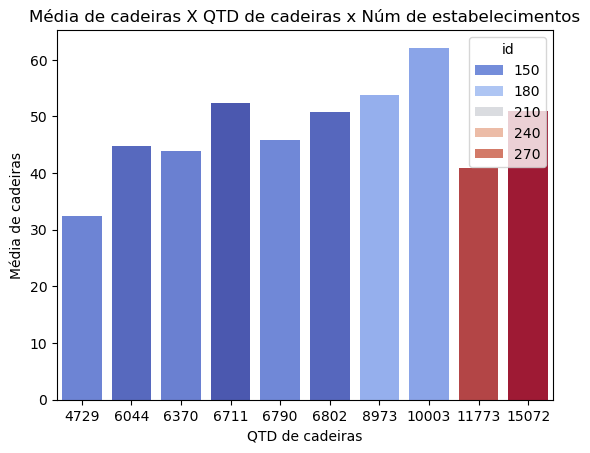

In [466]:
g5 = sns.barplot(
    data=address_10, 
    x='number2', 
    y='number1', 
    hue='id', 
    palette='coolwarm',) 
g5.set_xlabel('QTD de cadeiras')
g5.set_ylabel('Média de cadeiras')
plt.title('Média de cadeiras X QTD de cadeiras x Núm de estabelecimentos')


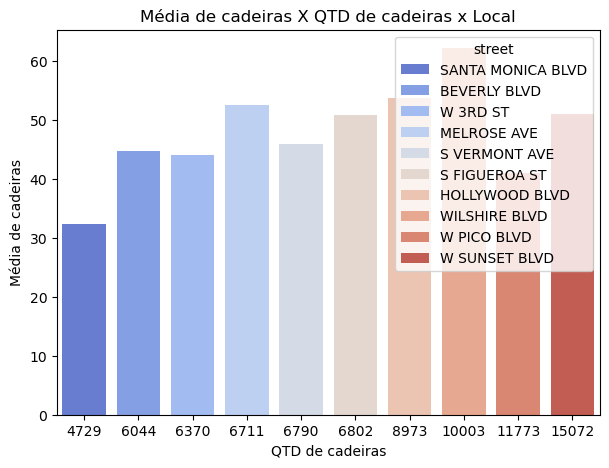

In [467]:
fig, g6 = plt.subplots(figsize=(7, 5))

sns.barplot(
    data=address_10, 
    x='number2', 
    y='number1', 
    hue='street', 
    palette='coolwarm',
    ax=g6) 
g6.set_ylabel('Média de cadeiras')
g6.set_xlabel('QTD de cadeiras')
plt.title('Média de cadeiras X QTD de cadeiras x Local')

plt.show()

<div class="alert alert-info">
<strong>Comentário do estudante v2</strong>

 - Número de ruas que têm apenas um restaurante.
</div>

    Lista de locais com somente um estabelecimento

In [468]:
# agrupamento por endereço e cadeiras
group_address_min = merge_df.groupby(['street',]).agg({'id':'count','number1':'mean','number2':'sum'}).reset_index()
group_address_min1 = group_address_min[group_address_min['id']==1]

print(group_address_min1.count())
print(group_address_min1)

street     2450
id         2450
number1    2450
number2    2450
dtype: int64
                   street  id  number1  number2
0              1/2 3RD ST   1     19.0       19
1              1/2 7TH ST   1     49.0       49
3     1/2 CITY TERRACE DR   1      1.0        1
4       1/2 COLORADO BLVD   1     25.0       25
6            1/2 E 2ND ST   1     47.0       47
...                   ...  ..      ...      ...
3068              YALE ST   1     44.0       44
3070          YORK BLVD B   1     19.0       19
3073               Z00 DR   1    190.0      190
3075               ZOO DR   1     10.0       10
3076       hollywood BLVD   1      5.0        5

[2450 rows x 4 columns]


<div class="alert alert-info">
<strong>Comentário do estudante v2</strong>

Tentativa de visualização onde no eixo Y é a QTD de estabelecimentos e no eixo X é QTD de cadeiras, o arupamento esta sendo feito por rua indicados na legenda.
</div>

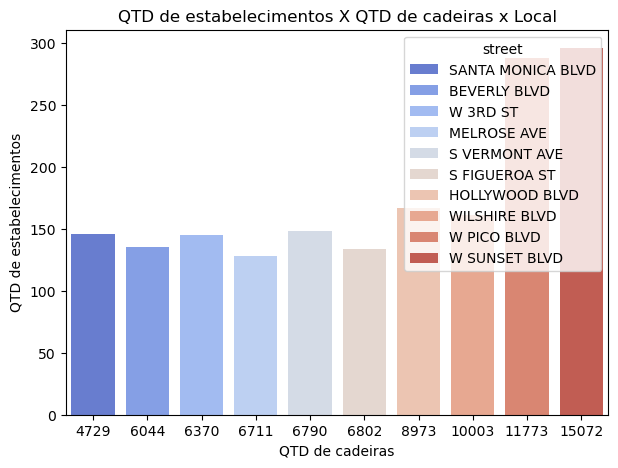

In [469]:
fig, g6_rev2 = plt.subplots(figsize=(7, 5))

sns.barplot(
    data=address_10, 
    x='number2', 
    y='id', 
    hue='street', 
    palette='coolwarm',
    ax=g6_rev2) 
g6_rev2.set_ylabel('QTD de estabelecimentos')
g6_rev2.set_xlabel('QTD de cadeiras')
plt.title('QTD de estabelecimentos X QTD de cadeiras x Local')

plt.show()

Verificação frequência da quantidade de cadeiras

<Axes: xlabel='number2', ylabel='Count'>

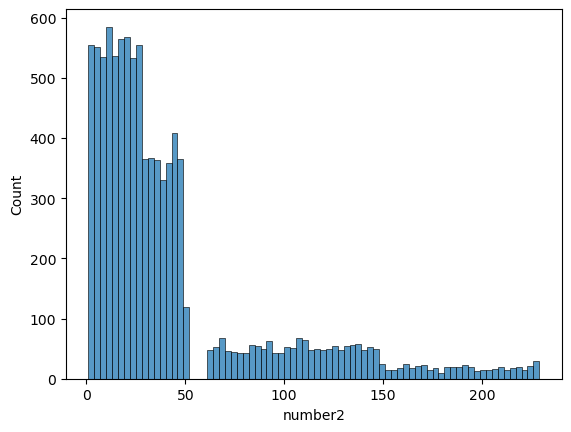

In [470]:
sns.histplot(merge_df['number2'])

 - Seleção dos estabelicimentos com mais de 50 cadeiras;
 - Separação entre redes

In [471]:
# agrupamento por endereço e cadeiras
# group_address_max = merge_df.groupby(['street',]).agg({'id':'count','number1':'mean','number2':'sum'}).reset_index()
group_address_max1 = merge_df[merge_df['number2']>50]

group_address_maxT = group_address_max1[group_address_max1['chain']==True]
group_address_maxF = group_address_max1[group_address_max1['chain']==False]

Comparação da distribuição de estabelecimentos entre Redes

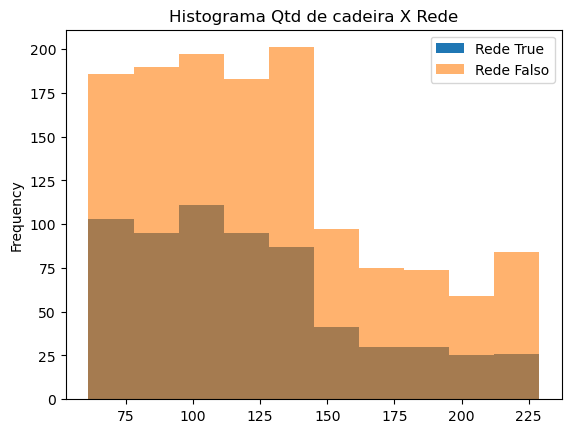

In [472]:

group_address_maxT['number2'].plot(
    kind='hist',
    x='number2',
    y='id',
    )
group_address_maxF['number2'].plot(
    kind='hist',
    x='number2',
    y='id',
    alpha=0.6)
plt.legend(['Rede True','Rede Falso'])
plt.title('Histograma Qtd de cadeira X Rede')
plt.show()

In [473]:
# Tentativa de visualização de distribuição e frequencias de quantidade de estabelicimentos e cadeiras

# sns.jointplot(
#     data=group_address_max1, 
#     x='number2', 
#     y='id', 
#     kind='reg',) 
# # g6_rev2.set_ylabel('QTD de estabelecimentos')
# # g6_rev2.set_xlabel('QTD de cadeiras')
# # plt.title('QTD de estabelecimentos X QTD de cadeiras x Local')

# plt.show()

<div class="alert alert-info">
<strong>Comentário do estudante v2</strong>

 - Locais com muitos restaurantes e quantidade de assentos
</div>

 - Nas localidades com mais estabelecimentos a quantidade de cadeiras é maior;

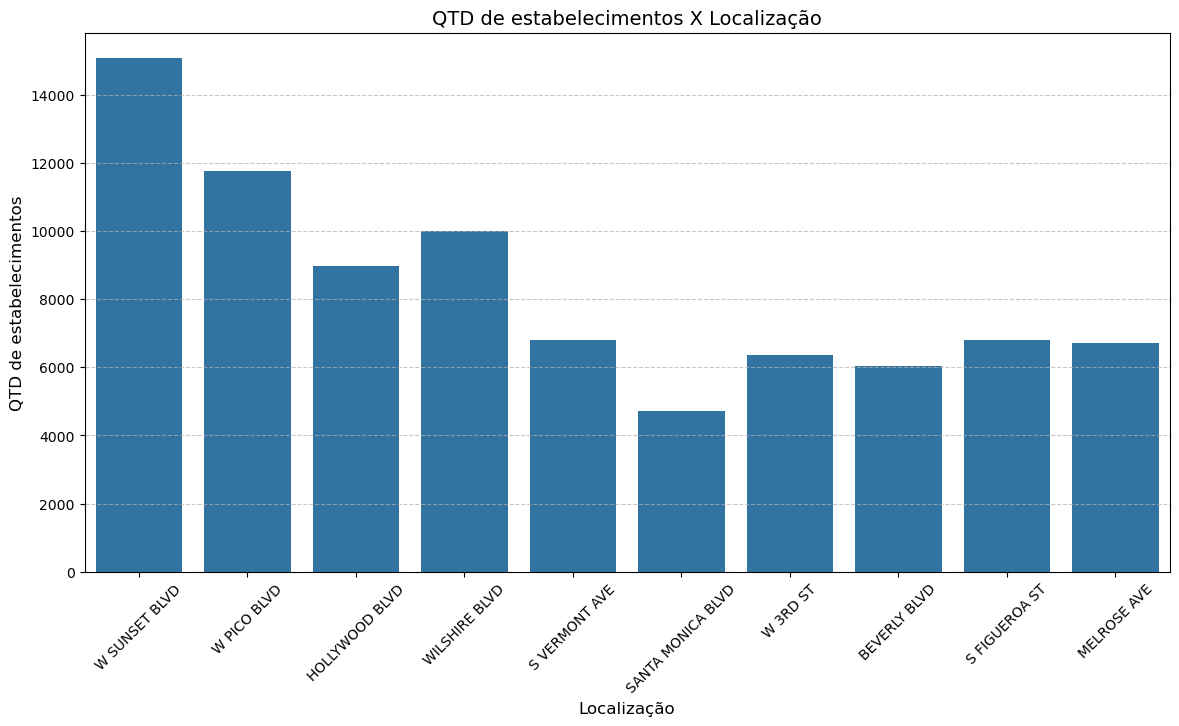

In [474]:

plt.figure(figsize=(14, 7))
sns.barplot(data=address_10, x='street', y='number2',)
plt.title('QTD de estabelecimentos X Localização', fontsize=14)
plt.xlabel('Localização', fontsize=12)
plt.ylabel('QTD de estabelecimentos', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<div class="alert alert-danger">
<strong>Comentário do revisor v2</strong>

Carlos, não consegui entender os gráficos dessa sessão.

O que a lição pede é:

    - Construa um gráfico de dez ruas com o maior número de restaurantes.
    - Encontre o número de ruas que têm apenas um restaurante.
    - Para as ruas com muitos restaurantes, olhe para a distribuição de número de assentos. Quais tendências você consegue notar?

As duas primeiras estão bem dominadas, você já tem os elementos para respondê-las, basta organizar os gráficos e conclusões.

Na terceira temos algumas opções. A minha sugestão seria olhar a distribuição do número de cadeiras por meio de um histograma, classificar o que seriam restaurantes com "muitas cadeiras" (aqueles com mais de x assentos, o histogtrama deve te ajudar nisso) e posteriormente criar uma visualização comparativa entre os grupos e suas respectivas distribuições. 
</div>


<div class="alert alert-danger">
<strong>Comentário do revisor v2</strong>

Pontos endereçados adequadamente em sua maioria, eu só não encontrei o # de  ruas com apenas um restaurante embora esteja mencionado ai no meio.
</div>


<a id="df_10_TF"></a>
### 4.2 Análise dos principais endereços por Rede True and False

In [475]:
# agrupamento por endereço e cadeiras
group_merge_df2 = merge_df.groupby(['street','chain','object_type']).agg({'id':'count','number1':'mean','number2':'sum'}).reset_index()

print(group_merge_df2.sort_values(by=['id','number2'],ascending=[False,False]).head(20))

                 street  chain object_type   id    number1  number2
3610        W PICO BLVD  False  Restaurant  169  42.976331     7263
3705      W SUNSET BLVD  False  Restaurant  158  56.322785     8899
877      HOLLYWOOD BLVD  False  Restaurant  101  57.712871     5829
3921      WILSHIRE BLVD  False  Restaurant  100  63.580000     6358
3017           W 3RD ST  False  Restaurant   86  51.476744     4427
1115        MELROSE AVE  False  Restaurant   85  56.800000     4828
208        BEVERLY BLVD  False  Restaurant   77  56.025974     4314
2703  SANTA MONICA BLVD  False  Restaurant   75  31.386667     2354
3507     W OLYMPIC BLVD  False  Restaurant   72  58.458333     4209
2443      S VERMONT AVE  False  Restaurant   71  45.563380     3235
1891      S FIGUEROA ST  False  Restaurant   69  60.000000     4140
2520      S WESTERN AVE  False  Restaurant   64  52.437500     3356
3711      W SUNSET BLVD   True  Restaurant   59  54.050847     3189
3272           W 8TH ST  False  Restaurant   54 

    Ao separar em Rede, conseguimos ver uma grande diferença de proporção nos locais mais movimentados:
     - Predominância de estabelecimentos independentes, numa proporção maior do que verificação inicial de 62%, contra a de 10% do gráfico atual (2/20) , sendo necessário cuidado ao aprofundar as análises;
     - Uma maior quantidade de estabelecimentos não quer dizer uma maior média de cadeiras, sendo necessário cuidado ao aprofundar as análises;

Text(0.5, 1.0, 'Média de cadeiras X QTD de cadeiras x Rede')

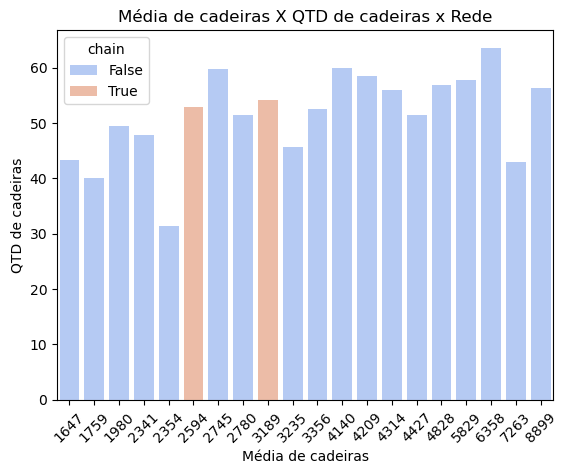

In [476]:
filtro_address = group_merge_df2.nlargest(20, 'id')

g7 = sns.barplot(
    data=filtro_address, 
    x='number2', 
    y='number1', 
    hue='chain', 
    palette='coolwarm',)
g7.set_xlabel('Média de cadeiras')
plt.xticks(rotation=45)
g7.set_ylabel('QTD de cadeiras')
plt.title('Média de cadeiras X QTD de cadeiras x Rede')

<a id="conclusao"></a>
## 5. Conclusão

    Como premissa, estou considerando densidade a quantidade de estabelecimentos por local e quantidade de cadeiras, com isso, podemos verificar que a maior proporção dos estabelecimentos são independentes e isso se reflete nos locais com maior densidade, mas não na mesma razão, a razão nos 20 locais mais movimentados é somente de 10% de rede, enquanto analisando o total geral é de 38%.
    Nesses top 20 locais, todos são restaurantes sendo 2 pertencentes a redes.
    Com essas observações, não fica totalmente claro se há mais oportunidades para se inserir no mercado como uma cafeteria de Rede ou não, mas quanto ao tipo de negócio Cafeteria, podemos abrir algumas hipóteses.
    Nos 20 locais com maior densidade o tipo de negocio dominante é de Restaurantes, nos abrindo a hipótese de que abrir uma cafeteria é bom pois os clientes após sairem do restaurantes tem possibilidade de tomar um café.
    A outra possibilidade de hipótese, é abrir em algum dos 9 locais mais densos, para aumentar o marketing visual e a possibilidade dos clientes irem após a refeição nos restaurantes